# regex test

In [ ]:
import os
import re

In [4]:
os.getcwd()

'/project/NeuralNet/CRC/ChIP-seq/mapping/STAR/rmdup_bam'

In [3]:
os.chdir(os.getcwd()+"/rmdup_bam/")

In [5]:
os.listdir(os.getcwd())

['H3K27ac_HI-32.bam.bai',
 'H3K27ac_HI-45.bam',
 'H3K27ac_HI-45.bam.bai',
 'H3K4me1_HI-21.bam',
 'H3K4me1_HI-21.bam.bai',
 'H3K4me1_HI-25.bam',
 'H3K4me1_HI-25.bam.bai',
 'H3K4me1_HI-32.bam.bai',
 'H3K4me3_HI-21.bam',
 'H3K4me3_HI-21.bam.bai',
 'H3K4me3_HI-25.bam',
 'H3K4me3_HI-25.bam.bai',
 'H3K4me3_HI-32.bam.bai',
 'H3K27ac_HI-32.bam',
 'H3K4me1_HI-32.bam',
 'H3K4me3_HI-32.bam',
 'H3K4me1.merged.bam',
 'H3K4me3.merged.bam',
 'H3K27ac.merged.bam']

In [19]:
re.findall(r"(HI.\d+)", str(os.listdir(os.getcwd())))

['HI-32',
 'HI-45',
 'HI-45',
 'HI-21',
 'HI-21',
 'HI-25',
 'HI-25',
 'HI-32',
 'HI-21',
 'HI-21',
 'HI-25',
 'HI-25',
 'HI-32',
 'HI-32',
 'HI-32',
 'HI-32']

In [ ]:
re.findall(r"(*)", str(os.listdir(os.getcwd())))

# size distribution

In [88]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [90]:
os.chdir("/project/NeuralNet/CRC/ChIP-seq/crup/")

In [97]:
df = pd.read_csv("islets.merged.CRUP.clusterEnh.bed", sep="\t", header=None)
crupEnh = df[2] - df[1]  # 11341

,0,1,2,3,4,5
0,1,761400,769600,.,0,.
1,1,873000,895900,.,0,.
2,1,1333000,1376500,.,0,.
3,1,8253300,8263800,.,0,.
4,1,8311800,8321100,.,0,.
...,...,...,...,...,...,...
11336,11,85373500,85376900,.,0,.
11337,7,128501800,128504500,.,0,.
11338,8,41832900,41835100,.,0,.
11339,1,231663100,231665800,.,0,.


In [102]:
os.chdir("/project/NeuralNet/CRC/Papers/EnhancerHub_PubMed31253982/")

In [108]:
df = pd.read_csv("islet.enhHubs.bed", sep="\t", header=None)
hubs = df[2] - df[1]  # 1318

df = pd.read_csv("islet.se.bed", sep="\t", header=None)
SE = df[2] - df[1]  # 770

df = pd.read_csv("islet.enhClusters.bed", sep="\t", header=None)
clusters = df[2] - df[1]  # 3677

df = pd.read_csv("islet.enhClusters.TF.bed", sep="\t", header=None)
clusters_TF = df[2] - df[1]  # 1813

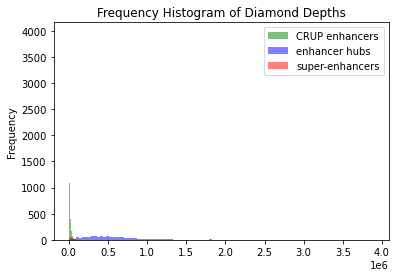

In [127]:
kwargs = dict(alpha=0.5, bins=100)

plt.hist(crupEnh, **kwargs, color='g', label='CRUP enhancers')
plt.hist(hubs, **kwargs, color='b', label='enhancer hubs')
plt.hist(SE, **kwargs, color='r', label='super-enhancers')
plt.gca().set(title='Frequency Histogram of Diamond Depths', ylabel='Frequency')
#plt.xlim(500, 4e6)
#plt.xticks(np.arange(500, 4e6, 1e3))
plt.legend();

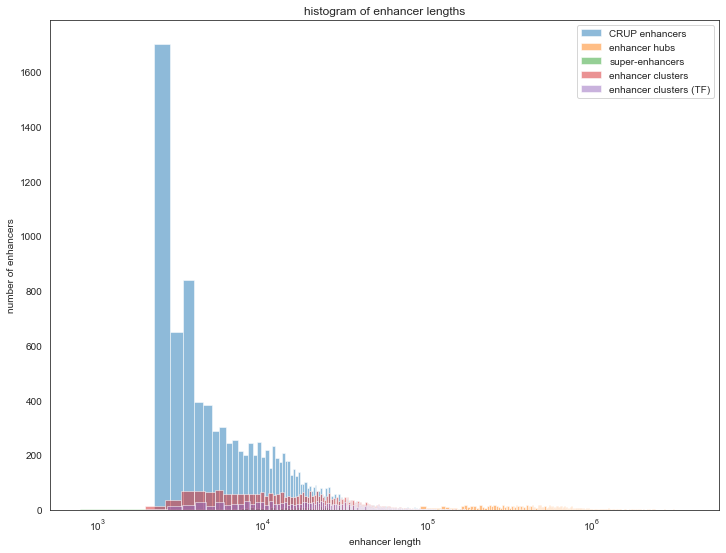

In [156]:
kwargs = dict(alpha=0.5, bins=500)

plt.figure(figsize=(12,9))

plt.hist(crupEnh, **kwargs, label='CRUP enhancers')
plt.hist(hubs, **kwargs, label='enhancer hubs')
plt.hist(SE, **kwargs, label='super-enhancers')
plt.hist(clusters, **kwargs, label='enhancer clusters')
plt.hist(clusters_TF, **kwargs, label='enhancer clusters (TF)')
plt.gca().set(title='histogram of enhancer lengths', ylabel='number of enhancers', xlabel="enhancer length")
plt.gca().set_xscale("log")
#plt.ylim(0, 1500)
#plt.yticks(np.arange(0, 1500, 300))
plt.legend()

/project/NeuralNet/software/miniconda3/envs/TF_NN/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/project/NeuralNet/software/miniconda3/envs/TF_NN/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/project/NeuralNet/software/miniconda3/envs/TF_NN/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your c

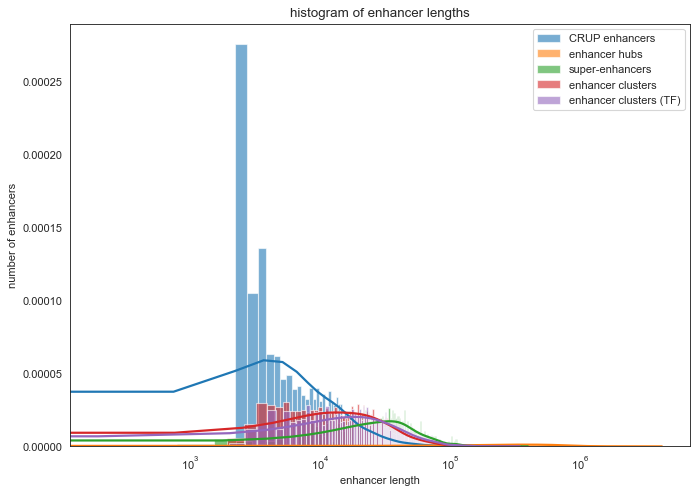

In [157]:
import seaborn as sns
sns.set_style("white")
kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2}, bins=500)

plt.figure(figsize=(10,7), dpi= 80)
sns.distplot(crupEnh, **kwargs, label='CRUP enhancers')
sns.distplot(hubs, **kwargs, label='enhancer hubs')
sns.distplot(SE, **kwargs, label='super-enhancers')
sns.distplot(clusters, **kwargs, label='enhancer clusters')
sns.distplot(clusters_TF, **kwargs, label='enhancer clusters (TF)')

plt.gca().set(title='histogram of enhancer lengths', ylabel='number of enhancers', xlabel="enhancer length")
plt.gca().set_xscale("log")
plt.legend()

In [150]:
plt.close()

# Venn diagram

In [2]:
df = pd.DataFrame(np.array(["CRUP enhancers", "enhancer hubs", 11341, 1318, 5989, 1314, 
                            "CRUP enhancers", "super-enhancers", 11341, 770, 836, 770, 
                            "CRUP enhancers", "enhancer clusters", 11341, 3677, 1258, 1091, 
                            "CRUP enhancers", "enhancer clusters (TF)", 11341, 1813, 697, 579]).reshape(4, 6),
                  columns=["bedA", "bedB", "A", "B", "A and B in A", "A and B in B"])

In [3]:
df = df.apply(pd.to_numeric, errors='ignore')
print(df.dtypes)
df

bedA            object
bedB            object
A                int64
B                int64
A and B in A     int64
A and B in B     int64
dtype: object


,bedA,bedB,A,B,A and B in A,A and B in B
0,CRUP enhancers,enhancer hubs,11341,1318,5989,1314
1,CRUP enhancers,super-enhancers,11341,770,836,770
2,CRUP enhancers,enhancer clusters,11341,3677,1258,1091
3,CRUP enhancers,enhancer clusters (TF),11341,1813,697,579


In [1]:
# import libraries
import matplotlib.pyplot as plt
from matplotlib_venn import venn2, venn2_circles

import numpy as np
import pandas as pd

In [67]:
df["A and B in A (%)"] = df["A and B in A"] / df.A
df["A and B in B (%)"] = df["A and B in B"] / df.B
df["abbr_bedA"] = ["CE"] * 4
df["abbr_bedB"] = ["EH", "SE", "EC", "EC_TF"]

In [68]:
df.style.format({"A and B in A (%)": "{:.2%}", "A and B in B (%)": "{:.2%}"})

,bedA,bedB,A,B,A and B in A,A and B in B,A and B in A (%),A and B in B (%),abbr_bedA,abbr_bedB
0,CRUP enhancers,enhancer hubs,11341,1318,5989,1314,52.81%,99.70%,CE,EH
1,CRUP enhancers,super-enhancers,11341,770,836,770,7.37%,100.00%,CE,SE
2,CRUP enhancers,enhancer clusters,11341,3677,1258,1091,11.09%,29.67%,CE,EC
3,CRUP enhancers,enhancer clusters (TF),11341,1813,697,579,6.15%,31.94%,CE,EC_TF


## CRUP enhancers vs enhancer hubs overlap

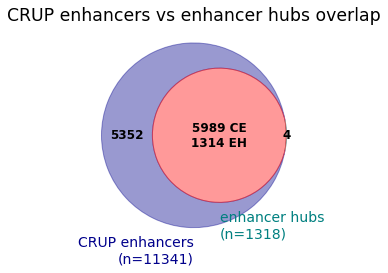

In [83]:
# Ab, aB, AB
# 10, 01, 11

v2 = venn2(subsets = {"10": (df.A - df["A and B in A"])[0],
                      "01": (df.B - df["A and B in B"])[0],
                      "11": df["A and B in A"][0]}, 
           set_labels = (f"{df.bedA[0]}\n(n={df.A[0]})", f"{df.bedB[0]}\n(n={df.B[0]})"))

colors = ["darkblue", "teal", "red"]
i = 0
for text in v2.set_labels:
    text.set_fontsize(14)                  #set label's fontsize 
    text.set_color(colors[i])                 #set label's font colour
    i += 1

IDs = ["10", "01", "11"]
i = 0
for ids in IDs:
    v2.get_patch_by_id(ids).set_color(colors[i])
    i += 1
    
for text in v2.subset_labels:
    text.set_fontsize(12)                #set circle's value fontsize 
    text.set_color('black')              #set circle's value font colour
    text.set_fontweight('bold')
    text.set_alpha(1)                    #set circle's value font transparency

v2.get_label_by_id('11').set_text(f'{df["A and B in A"][0]} {df.abbr_bedA[0]}\n{df["A and B in B"][0]} {df.abbr_bedB[0]}')

plt.title("CRUP enhancers vs enhancer hubs overlap", fontsize='xx-large', loc="center") #set title
plt.show()

## CRUP enhancers vs super-enhancers overlap

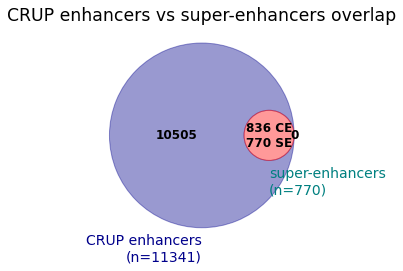

In [85]:
v2 = venn2(subsets = {"10": (df.A - df["A and B in A"])[1],
                      "01": (df.B - df["A and B in B"])[1],
                      "11": df["A and B in A"][1]}, 
           set_labels = (f"{df.bedA[1]}\n(n={df.A[1]})", f"{df.bedB[1]}\n(n={df.B[1]})"))

colors = ["darkblue", "teal", "red"]
i = 0
for text in v2.set_labels:
    text.set_fontsize(14)                  #set label's fontsize 
    text.set_color(colors[i])                 #set label's font colour
    i += 1

IDs = ["10", "01", "11"]
i = 0
for ids in IDs:
    v2.get_patch_by_id(ids).set_color(colors[i])
    i += 1
    
for text in v2.subset_labels:
    text.set_fontsize(12)                #set circle's value fontsize 
    text.set_color('black')              #set circle's value font colour
    text.set_fontweight('bold')
    text.set_alpha(1)                    #set circle's value font transparency

v2.get_label_by_id('11').set_text(f'{df["A and B in A"][1]} {df.abbr_bedA[1]}\n{df["A and B in B"][1]} {df.abbr_bedB[1]}')

plt.title("CRUP enhancers vs super-enhancers overlap", fontsize='xx-large', loc="center") #set title
plt.show()

## CRUP enhancers vs enhancer clusters overlap

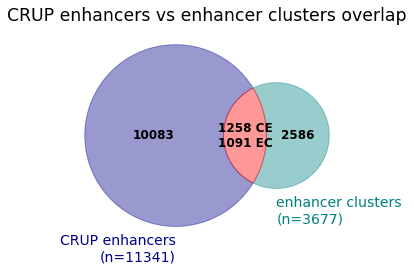

In [84]:
v2 = venn2(subsets = {"10": (df.A - df["A and B in A"])[2],
                      "01": (df.B - df["A and B in B"])[2],
                      "11": df["A and B in A"][2]}, 
           set_labels = (f"{df.bedA[2]}\n(n={df.A[2]})", f"{df.bedB[2]}\n(n={df.B[2]})"))

colors = ["darkblue", "teal", "red"]
i = 0
for text in v2.set_labels:
    text.set_fontsize(14)                  #set label's fontsize 
    text.set_color(colors[i])                 #set label's font colour
    i += 1

IDs = ["10", "01", "11"]
i = 0
for ids in IDs:
    v2.get_patch_by_id(ids).set_color(colors[i])
    i += 1
    
for text in v2.subset_labels:
    text.set_fontsize(12)                #set circle's value fontsize 
    text.set_color('black')              #set circle's value font colour
    text.set_fontweight('bold')
    text.set_alpha(1)                    #set circle's value font transparency

v2.get_label_by_id('11').set_text(f'{df["A and B in A"][2]} {df.abbr_bedA[2]}\n{df["A and B in B"][2]} {df.abbr_bedB[2]}')

plt.title("CRUP enhancers vs enhancer clusters overlap", fontsize='xx-large', loc="center") #set title
plt.show()

## CRUP enhancers vs enhancer clusters (highly bound by islet TFs) overlap

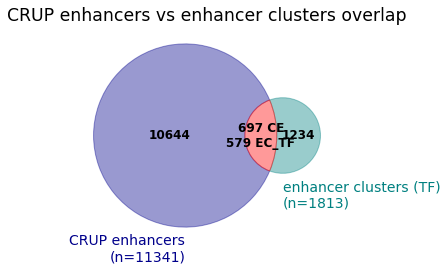

In [86]:
v2 = venn2(subsets = {"10": (df.A - df["A and B in A"])[3],
                      "01": (df.B - df["A and B in B"])[3],
                      "11": df["A and B in A"][3]}, 
           set_labels = (f"{df.bedA[3]}\n(n={df.A[3]})", f"{df.bedB[3]}\n(n={df.B[3]})"))

colors = ["darkblue", "teal", "red"]
i = 0
for text in v2.set_labels:
    text.set_fontsize(14)                  #set label's fontsize 
    text.set_color(colors[i])                 #set label's font colour
    i += 1

IDs = ["10", "01", "11"]
i = 0
for ids in IDs:
    v2.get_patch_by_id(ids).set_color(colors[i])
    i += 1
    
for text in v2.subset_labels:
    text.set_fontsize(12)                #set circle's value fontsize 
    text.set_color('black')              #set circle's value font colour
    text.set_fontweight('bold')
    text.set_alpha(1)                    #set circle's value font transparency

v2.get_label_by_id('11').set_text(f'{df["A and B in A"][3]} {df.abbr_bedA[3]}\n{df["A and B in B"][3]} {df.abbr_bedB[3]}')

plt.title("CRUP enhancers vs enhancer clusters overlap", fontsize='xx-large', loc="center") #set title
plt.show()

ref:

1. **[Matplotlib Series 6: Venn diagram](https://jingwen-z.github.io/data-viz-with-matplotlib-series6-venn-diagram/)**
2. [How to Create and Customize Venn Diagrams in Python](https://towardsdatascience.com/how-to-create-and-customize-venn-diagrams-in-python-263555527305)
3. [Venn Gogh](https://bernard-mlab.com/post/venn-gogh/)
4. [Professional Venn diagrams in Python](https://towardsdatascience.com/professional-venn-diagrams-in-python-638abfff39cc)

# bed2gff

In [2]:
import pandas as pd
import numpy as np
import os

In [3]:
os.getcwd()

'/project/NeuralNet/CRC'

In [5]:
os.listdir("./crup/")

['islets.HI-32.CRUP.clusterEnh.bed',
 'islets.HI-32.CRUP.prediction.bw',
 'islets.HI-32.CRUP.prediction.rds',
 'islets.HI-32.CRUP.singleEnh.bedGraph',
 'CRUPtmp',
 'islets.merged.CRUP.clusterEnh.bed',
 'islets.merged.CRUP.prediction.bw',
 'islets.merged.CRUP.prediction.rds',
 'islets.merged.CRUP.singleEnh.bedGraph',
 'islets.merged.CRUP.clusterEnh.sorted.bed',
 'hg19.chrom.sizes',
 'islets.HI-32.CRUP.clusterEnh.sorted.bed',
 '.~lock.islets.HI-32.CRUP.clusterEnh.bed#']

In [39]:
# read bed file
bed = pd.read_csv("./crup/islets.HI-32.CRUP.clusterEnh.bed", sep="\t", header=None)
bed.columns = ["chr", "start", "end", "ID", "score", "strand"]

In [61]:
pd.read_csv("./ROSE/ROSE_DATA/data/HG18_MM1S_MED1_1000.gff").head()


,chr6\tMM1S_MED1_DMSO_2_15567\t\t41854892\t41856607\t\t.\t\tMM1S_MED1_DMSO_2_15567
0,chr1\tMM1S_MED1_DMSO_2_1073\t\t154844420\t1548...
1,chr1\tMM1S_MED1_DMSO_2_542\t\t51755792\t517583...
2,chr10\tMM1S_MED1_DMSO_2_2063\t\t49183924\t4918...
3,chr9\tMM1S_MED1_DMSO_2_18173\t\t16449020\t1645...
4,chr17\tMM1S_MED1_DMSO_2_7679\t\t63797622\t6380...


In [40]:
bed.head()

,chr,start,end,ID,score,strand
0,1,761400,769000,.,0,.
1,1,873000,881300,.,0,.
2,1,1341000,1374900,.,0,.
3,1,7727100,7730400,.,0,.
4,1,8136300,8158400,.,0,.


In [58]:
# create gff file from bed file genereated by CRUP
gff = pd.DataFrame(columns = ["chr", "name1", "empty1", "start", "end", "empty2", "empty3", "strand", "empty4", "empty5", "name2"])
# 11 columns in total
gff.head()

,chr,name1,empty1,start,end,empty2,empty3,strand,empty4,empty5,name2


In [59]:
# assign values to column chr, start, end. name1, strand, name2
gff.chr = ["".join(["chr", bed.chr[i]]) for i in range(bed.shape[0])]
gff.start = bed.start
gff.end = bed.end
gff.strand = bed.strand
gff.name1 = ["_".join(["islets_HI-32_CRUP_clusterEnh", str(i)]) for i in range(bed.shape[0])]
gff.name2 = ["_".join(["islets_HI-32_CRUP_clusterEnh", str(i)]) for i in range(bed.shape[0])]
gff.head()

,chr,name1,empty1,start,end,empty2,empty3,strand,empty4,empty5,name2
0,chr1,islets_HI-32_CRUP_clusterEnh_0,NaN,761400,769000,NaN,NaN,.,NaN,NaN,islets_HI-32_CRUP_clusterEnh_0
1,chr1,islets_HI-32_CRUP_clusterEnh_1,NaN,873000,881300,NaN,NaN,.,NaN,NaN,islets_HI-32_CRUP_clusterEnh_1
2,chr1,islets_HI-32_CRUP_clusterEnh_2,NaN,1341000,1374900,NaN,NaN,.,NaN,NaN,islets_HI-32_CRUP_clusterEnh_2
3,chr1,islets_HI-32_CRUP_clusterEnh_3,NaN,7727100,7730400,NaN,NaN,.,NaN,NaN,islets_HI-32_CRUP_clusterEnh_3
4,chr1,islets_HI-32_CRUP_clusterEnh_4,NaN,8136300,8158400,NaN,NaN,.,NaN,NaN,islets_HI-32_CRUP_clusterEnh_4
5,chr1,islets_HI-32_CRUP_clusterEnh_5,NaN,8254300,8264000,NaN,NaN,.,NaN,NaN,islets_HI-32_CRUP_clusterEnh_5
6,chr1,islets_HI-32_CRUP_clusterEnh_6,NaN,8311500,8320900,NaN,NaN,.,NaN,NaN,islets_HI-32_CRUP_clusterEnh_6
7,chr1,islets_HI-32_CRUP_clusterEnh_7,NaN,8426600,8434500,NaN,NaN,.,NaN,NaN,islets_HI-32_CRUP_clusterEnh_7
8,chr1,islets_HI-32_CRUP_clusterEnh_8,NaN,8455200,8523900,NaN,NaN,.,NaN,NaN,islets_HI-32_CRUP_clusterEnh_8
9,chr1,islets_HI-32_CRUP_clusterEnh_9,NaN,8711900,8788100,NaN,NaN,.,NaN,NaN,islets_HI-32_CRUP_clusterEnh_9


In [62]:
gff.fillna("", inplace=True)
gff.head()

,chr,name1,empty1,start,end,empty2,empty3,strand,empty4,empty5,name2
0,chr1,islets_HI-32_CRUP_clusterEnh_0,,761400,769000,,,.,,,islets_HI-32_CRUP_clusterEnh_0
1,chr1,islets_HI-32_CRUP_clusterEnh_1,,873000,881300,,,.,,,islets_HI-32_CRUP_clusterEnh_1
2,chr1,islets_HI-32_CRUP_clusterEnh_2,,1341000,1374900,,,.,,,islets_HI-32_CRUP_clusterEnh_2
3,chr1,islets_HI-32_CRUP_clusterEnh_3,,7727100,7730400,,,.,,,islets_HI-32_CRUP_clusterEnh_3
4,chr1,islets_HI-32_CRUP_clusterEnh_4,,8136300,8158400,,,.,,,islets_HI-32_CRUP_clusterEnh_4


In [63]:
gff.to_csv("./ROSE/crup_data/islets.HI-32.CRUP.clusterEnh.gff", sep="\t", header=False, index=False)

# SRR access list & renaming

In [84]:
import pandas as pd
import numpy as np
import os
import re

In [214]:
ls = pd.read_csv("./ChIP-seq/Meissner/SRR_ChIP-seq_acc_list.txt", header=0, index_col=None, sep="\t", usecols=range(1, 12))
ls.head(5)

,Run,BioSample,AvgSpotLen,Bases,Bytes,Cell_type,chip_antibody,Experiment,GEO_Accession,Sample Name,STAGE
0,SRR10466342,SAMN13293860,60,499.49 M,245.96 Mb,hPSC-derived definitive endoderm,H3K27ac (Active Motif: 39133),SRX7157628,GSM4171646,GSM4171646,Stage 1 day 3
1,SRR10466343,SAMN13293860,60,523.25 M,255.38 Mb,hPSC-derived definitive endoderm,H3K27ac (Active Motif: 39133),SRX7157628,GSM4171646,GSM4171646,Stage 1 day 3
2,SRR10466344,SAMN13293859,60,432.13 M,212.61 Mb,hPSC-derived definitive endoderm,H3K27ac (Active Motif: 39133),SRX7157629,GSM4171647,GSM4171647,Stage 1 day 3
3,SRR10466345,SAMN13293859,60,453.58 M,221.27 Mb,hPSC-derived definitive endoderm,H3K27ac (Active Motif: 39133),SRX7157629,GSM4171647,GSM4171647,Stage 1 day 3
4,SRR10466346,SAMN13293858,60,541.65 M,260.45 Mb,hPSC-derived definitive endoderm,none,SRX7157630,GSM4171648,GSM4171648,Stage 1 day 3


In [219]:
ls["abbr"] = pd.Series(["DE"]*6 + ["PP1"]*6 + ["PP2"]*4 + ["EN"]*6 + ["SC-beta"]*6 + ["PH"]*4 + ["alpha"]*2 + ["beta"]*2 + ["EN"]*2 + ["SC-beta"]*2 + ["PH"]*2)


antibody = []
for i in ls.chip_antibody:
    if re.match("H", i):
        antibody += [i.split(" ")[0]]
    else:
        antibody += ["WCE"]
ls["antibody"] = pd.Series(antibody)

rep = []
for i in ls.groupby(by=["abbr", "antibody"], sort=False).size():
    if i%4 == 0:
        rep += ["rep1"]*2 + ["rep2"]*2
    else:
        rep += ["rep1"]*2
ls["rep"] = pd.Series(rep)

ls["run"] = pd.Series(["run1", "run2"]*21)

ls["filename"] = pd.Series(["_".join(ls.loc[i, ["abbr", "antibody", "rep", "run"]]) for i in range(len(ls))])

In [222]:
ls.tail()

,Run,BioSample,AvgSpotLen,Bases,Bytes,Cell_type,chip_antibody,Experiment,GEO_Accession,Sample Name,STAGE,abbr,antibody,rep,run,filename
37,SRR10466379,SAMN13293863,50,2.67 G,1.48 Gb,hPSC-derived endocrine progenitor,H3K4me1 (Millipore: 17-614),SRX7157646,GSM4171664,GSM4171664,Stage 5 day 3,EN,H3K4me1,rep1,run2,EN_H3K4me1_rep1_run2
38,SRR10466380,SAMN13293862,50,382.39 M,220.03 Mb,hPSC-derived beta cell,H3K4me1 (Millipore: 17-614),SRX7157647,GSM4171665,GSM4171665,Stage 6 day 8,SC-beta,H3K4me1,rep1,run1,SC-beta_H3K4me1_rep1_run1
39,SRR10466381,SAMN13293862,50,386.75 M,223.55 Mb,hPSC-derived beta cell,H3K4me1 (Millipore: 17-614),SRX7157647,GSM4171665,GSM4171665,Stage 6 day 8,SC-beta,H3K4me1,rep1,run2,SC-beta_H3K4me1_rep1_run2
40,SRR10466382,SAMN13293861,50,1.82 G,1.01 Gb,hPSC-derived poly-hormonal cell,H3K4me1 (Millipore: 17-614),SRX7157648,GSM4171666,GSM4171666,Stage 6 day 8,PH,H3K4me1,rep1,run1,PH_H3K4me1_rep1_run1
41,SRR10466383,SAMN13293861,50,1.85 G,1.03 Gb,hPSC-derived poly-hormonal cell,H3K4me1 (Millipore: 17-614),SRX7157648,GSM4171666,GSM4171666,Stage 6 day 8,PH,H3K4me1,rep1,run2,PH_H3K4me1_rep1_run2


In [221]:
ls.to_csv("./ChIP-seq/Meissner/SRR_ChIP-seq_acc_list.txt", sep="\t", header=True, index=None)

In [225]:
ls.shape

(42, 16)